In [1]:
import numpy as np
from scipy.sparse import diags, csr_array
from scipy.sparse.linalg import spsolve, gmres
import matplotlib.pyplot as plt

In [2]:
# np.linspace(start, stop, N)
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [3]:
# np.arange(start, stop, step)
# 不包括stop这个值
x = np.arange(0, 1, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [22]:
# Dirichlet 边界
# D_xx
A = diags([1.0, -2.0, 1.0], [-1,0,1], shape=(10,10))
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [4]:
A = diags([1.0,1.0, -2.0, 1.0,1.0], [-9,-1,0,1,9], shape=(10,10))
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [5]:
A = diags([np.ones(9), -2.0*np.ones(10), np.ones(9)], [-1,0,1])
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [24]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements (3 diagonals) in DIAgonal format>

In [7]:
A = csr_array(A)
# u = A^{-1}x
# Au = x
# 矩阵分解的算法
# LU,QR
spsolve(A, x)

array([-1.5, -3. , -4.4, -5.6, -6.5, -7. , -7. , -6.4, -5.1, -3. ])

In [8]:
# Matrix free
# |Au - x|
gmres(A, x)[0]

array([-1.5, -3. , -4.4, -5.6, -6.5, -7. , -7. , -6.4, -5.1, -3. ])

In [12]:
sol = np.random.rand(3,4)
sol

array([[0.96154891, 0.25329603, 0.57485568, 0.18861549],
       [0.68488405, 0.13137278, 0.60723589, 0.68626189],
       [0.47137328, 0.47655576, 0.18750558, 0.35204462]])

In [14]:
a = sol.reshape(-1)
a

array([0.96154891, 0.25329603, 0.57485568, 0.18861549, 0.68488405,
       0.13137278, 0.60723589, 0.68626189, 0.47137328, 0.47655576,
       0.18750558, 0.35204462])

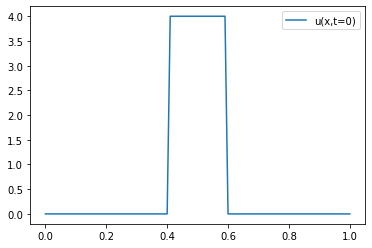

In [15]:
x = np.linspace(0, 1, 101)
# element wise
u0 = np.where(np.logical_and(x > 0.4, x < 0.6), 4.0, 0.0)

# 少写循环
plt.plot(x, u0, label="u(x,t=0)")
plt.legend()

In [16]:
np.logical_and(x > 0.4, x < 0.6)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [5]:
class Diffusion(object):
    # Initialization of constants 
    # u_t = cu_xx
    def __init__(self, u0, c, x, dt, T):
        self.u0 = u0
        self.c = c 
        self.x = x   
        self.Nx = x.size
        self.dx = x[1]-x[0]
        self.dt = dt  
        self.T = T
        self.t = np.arange(0, T+dt, dt)
        self.Nt = self.t.size
        self.sol = np.zeros((self.Nt, self.Nx))
        self.sol[0,:] = self.u0
        self.A = None
        self.B = None
    # Au = Bun
    # theta格式
    # u是下一个时刻的u
    # un是当前时刻的
    
    # CFL number func.   
    def CFL(self):
        return np.abs(self.c*self.dt/self.dx**2)

    # LHS Matrix assembly
    def LHSMatrixAssembly(self, sigma, theta):
        a1 = 2*theta*sigma+1
        a2 = -theta*sigma
        self.A = csr_array(diags([a2, a1, a2],[-1,0,1], shape=(self.Nx,self.Nx)))
        return
    
    # RHS Matrix assembly
    def RHSMatrixAssembly(self, sigma, theta):
        b1 = -2*(1-theta)*sigma + 1
        b2 = (1-theta)*sigma
        self.B = csr_array(diags([b2,b1,b2],[-1,0,1], shape=(self.Nx,self.Nx)))
        return
    
    # Solve
    def Solve(self, method="explicit", theta=None):
        sigma = self.CFL()
        print("cdt/dx^2 is:", sigma)
        un = np.copy(self.u0) # u in time tn
        u = np.copy(self.u0) # u in time tn+1
        if method == "explicit":
            print("using explicit method")
            self.RHSMatrixAssembly(sigma, 0)
            for ti in range(1, self.Nt):
                u[:] = self.B @ un
                self.sol[ti,:] = u
                u, un = un, u
        elif method == "implicit":
            print("using implicit method")
            self.LHSMatrixAssembly(sigma, 1)
            for ti in range(1, self.Nt):
                u[:] = spsolve(self.A, un)
                self.sol[ti,:] = u
                u, un = un, u
        elif method == "CN":
            if (theta >=0) & (theta <= 1):
                print("using C-N method with theta=", theta)
                self.LHSMatrixAssembly(sigma, theta)
                self.RHSMatrixAssembly(sigma, theta)
                for ti in range(1, self.Nt):
                    u[:] = spsolve(self.A, self.B @ un)
                    self.sol[ti,:] = u
                    u, un = un, u
            else:
                raise Exception("CN method should provide theta between \[0,1\]")
        return self.sol
    
    def plot(self):
        ti = [round(self.Nt*p) for p in [0.0, 0.2, 0.4, 0.6, 0.8]]
        ti.append(self.Nt-1)
        for i in ti:
            plt.plot(self.x, self.sol[i,:], label="t={:.3f}".format(self.t[i]))
        plt.legend()
        return

In [6]:
c = 0.01
x = np.linspace(0, 1,101)
u0 = np.where(np.logical_and(x > 0.4, x < 0.6), 4.0, 0.0)
dx = x[1] - x[0]
sigma = 0.6
dt = sigma*dx**2/c
T = 1.0

prob = Diffusion(u0, c, x, dt, T)

cdt/dx^2 is: 0.6
using C-N method with theta= 0.6


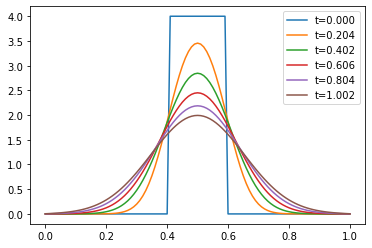

In [7]:
sol = prob.Solve("CN", 0.6)
prob.plot()

cdt/dx^2 is: 0.6
using explicit method


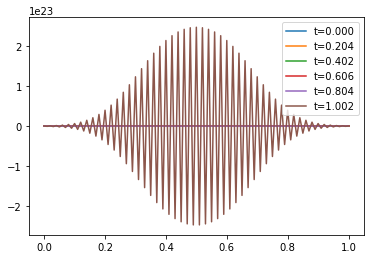

In [8]:
sol = prob.Solve("explicit")
prob.plot()

cdt/dx^2 is: 0.6
using implicit method


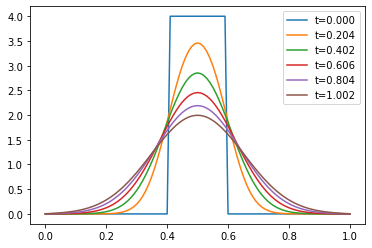

In [9]:
sol = prob.Solve("implicit")
prob.plot()